<a href="https://colab.research.google.com/github/laylaintheworld/personal-projects/blob/main/Search_Trends_for_Leisure_Activities_Among_Korean_Women_(20s_vs_40s).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

file_20s = "/content/drive/MyDrive/data/data_leisure_20s.xlsx"
file_40s = "/content/drive/MyDrive/data/data_leisure_40s.xlsx"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
# 메타데이터 제거
df_20s = pd.read_excel(file_20s, skiprows=5)
df_40s = pd.read_excel(file_40s, skiprows=5)

# 첫 번째 행을 컬럼명으로 설정
df_20s.columns = df_20s.iloc[0]
df_40s.columns = df_40s.iloc[0]

# 복수의 '날짜' 열 삭제를 위해 각각의 명칭 부여
column_changes = {
    0: "Date",
    2: "Date2",
    4: "Date3",
    6: "Date4",
    8: "Date5",
}

column_20s = list(df_20s.columns)
for column_index, column_name in column_changes.items():
    column_20s[column_index] = column_name
df_20s.columns = column_20s

column_40s = list(df_40s.columns)
for column_index, column_name in column_changes.items():
    column_40s[column_index] = column_name

df_20s.columns = column_20s
df_40s.columns = column_40s

 # 중복 컬럼 삭제
columns_to_remove = ['Date2', 'Date3', 'Date4', 'Date5']
df_20s = df_20s.drop(columns=columns_to_remove)
df_40s = df_40s.drop(columns=columns_to_remove)

# 컬럼명 영문 변경
df_20s.rename(columns={"전시회": "Exhibition",
    "콘서트": "Concert",
    "뮤지컬": "Musical",
    "박물관": "Museum",
    "미술관": "Art Gallery",
    "팝업스토어": "Pop-up Store"}, inplace=True)

df_40s.rename(columns={"전시회": "Exhibition",
    "콘서트": "Concert",
    "뮤지컬": "Musical",
    "박물관": "Museum",
    "미술관": "Art Gallery",
    "팝업스토어": "Pop-up Store"}, inplace=True)

df_40s.head(5)

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Date,Exhibition,Concert,Musical,Museum,Pop-up Store
0,날짜,전시회,콘서트,뮤지컬,박물관,팝업스토어
1,2023-10-02,19.81929,27.81987,45.71553,18.88662,2.76887
2,2023-10-03,13.65491,23.18566,40.64412,11.67298,2.46283
3,2023-10-04,11.42524,24.3515,37.39434,3.11862,2.30253
4,2023-10-05,12.85339,23.88516,43.22354,3.38093,2.696


In [181]:
# 불필요한 행 제거
df_20s = df_20s[1:].reset_index(drop=True)
df_40s = df_40s[1:].reset_index(drop=True)

# "Date" 컬럼의 데이터 타입을 날짜 형식으로 변환
df_20s["Date"] = pd.to_datetime(df_20s["Date"], errors="coerce")
df_40s["Date"] = pd.to_datetime(df_40s["Date"], errors="coerce")

# Search Volume을 숫자로 변환
for col in df_20s.columns:
    if col != "Date":
        df_20s[col] = pd.to_numeric(df_20s[col], errors="coerce")

for col in df_40s.columns:
    if col != "Date":
        df_40s[col] = pd.to_numeric(df_40s[col], errors="coerce")

df_20s

,Date,Exhibition,Concert,Musical,Museum,Pop-up Store
0,2023-10-02,23.98349,23.97342,46.99074,2.59661,5.95813
1,2023-10-03,19.87721,23.47020,45.22946,2.22423,5.63607
2,2023-10-04,19.85708,25.75483,41.82769,1.95249,7.23631
3,2023-10-05,19.94766,24.54710,41.09299,1.75120,6.92431
4,2023-10-06,20.01811,24.52697,41.60628,1.46940,7.12560
...,...,...,...,...,...,...
362,2024-09-28,16.87801,27.40539,48.24879,2.04307,7.52818
363,2024-09-29,16.76731,28.35144,49.94967,2.53623,6.73309
364,2024-09-30,19.83695,27.85829,51.96256,2.15378,7.79991
365,2024-10-01,16.66666,23.36956,47.74557,2.57648,8.16223


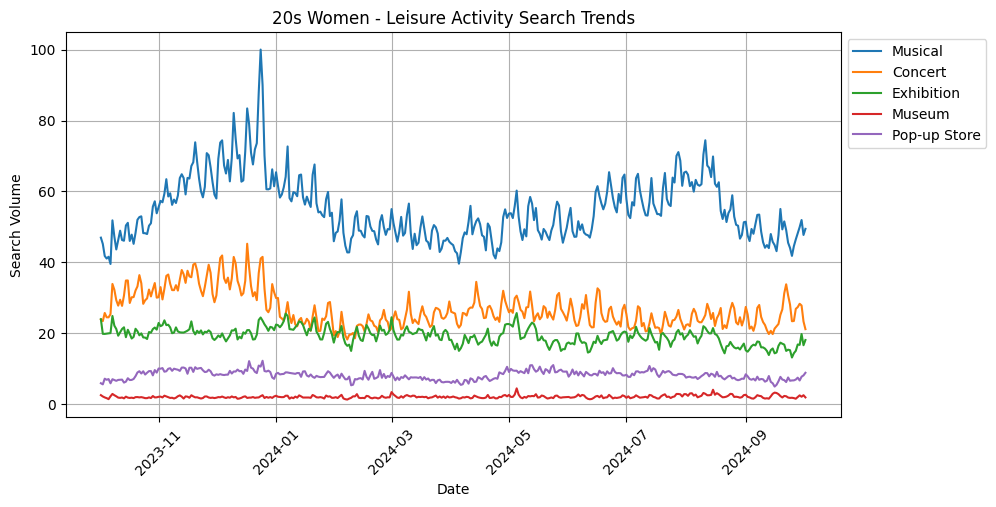

In [188]:
# 20대의 카테고리별 검색량 비교
plt.figure(figsize=(10, 5))
plt.plot(df_20s["Date"], df_20s["Musical"], label="Musical")
plt.plot(df_20s["Date"], df_20s["Concert"], label="Concert")
plt.plot(df_20s["Date"], df_20s["Exhibition"], label="Exhibition")
plt.plot(df_20s["Date"], df_20s["Museum"], label="Museum")
plt.plot(df_20s["Date"], df_20s["Pop-up Store"], label="Pop-up Store")
plt.xlabel("Date")
plt.ylabel("Search Volume")
plt.title("20s Women - Leisure Activity Search Trends")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid()
plt.show()

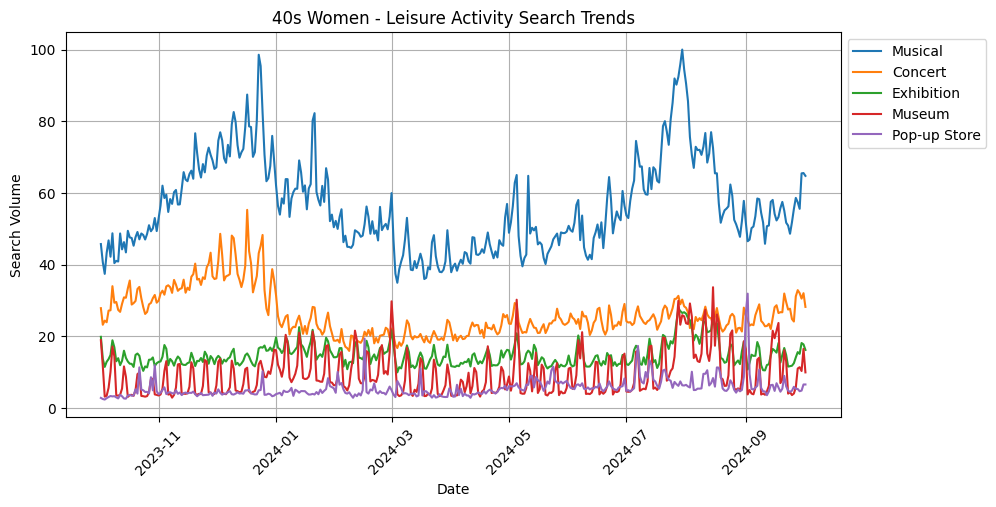

In [189]:
# 40대의 카테고리별 검색량 비교
plt.figure(figsize=(10, 5))
plt.plot(df_20s["Date"], df_40s["Musical"], label="Musical")
plt.plot(df_20s["Date"], df_40s["Concert"], label="Concert")
plt.plot(df_20s["Date"], df_40s["Exhibition"], label="Exhibition")
plt.plot(df_20s["Date"], df_40s["Museum"], label="Museum")
plt.plot(df_20s["Date"], df_40s["Pop-up Store"], label="Pop-up Store")
plt.xlabel("Date")
plt.ylabel("Search Volume")
plt.title("40s Women - Leisure Activity Search Trends")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [187]:
# 뮤지컬 월별 평균 검색량
df_20s["Year-Month"] = df_20s["Date"].dt.to_period("M")
monthly_avg_musical_20s = df_20s.groupby("Year-Month")["Musical"].mean().reset_index()

df_40s["Year-Month"] = df_40s["Date"].dt.to_period("M")
monthly_avg_musical_40s = df_40s.groupby("Year-Month")["Musical"].mean().reset_index()

print("✅ 20s Monthly Average of Musical Search Volume")
print(monthly_avg_musical_20s)

print("✅ 40s Monthly Average of Musical Search Volume")
print(monthly_avg_musical_40s)

✅ 20s Monthly Average of Musical Search Volume
   Year-Month    Musical
0     2023-10  48.211550
1     2023-11  62.338965
2     2023-12  71.199544
3     2024-01  58.883950
4     2024-02  49.182000
5     2024-03  48.244892
6     2024-04  47.463762
7     2024-05  51.405766
8     2024-06  54.815145
9     2024-07  59.274188
10    2024-08  59.440088
11    2024-09  47.837824
12    2024-10  48.606075
✅ 40s Monthly Average of Musical Search Volume
   Year-Month    Musical
0     2023-10  46.261531
1     2023-11  63.501890
2     2023-12  75.302503
3     2024-01  60.961720
4     2024-02  49.850747
5     2024-03  42.044071
6     2024-04  43.862814
7     2024-05  48.349013
8     2024-06  51.017677
9     2024-07  72.500724
10    2024-08  64.768095
11    2024-09  53.627218
12    2024-10  65.141350


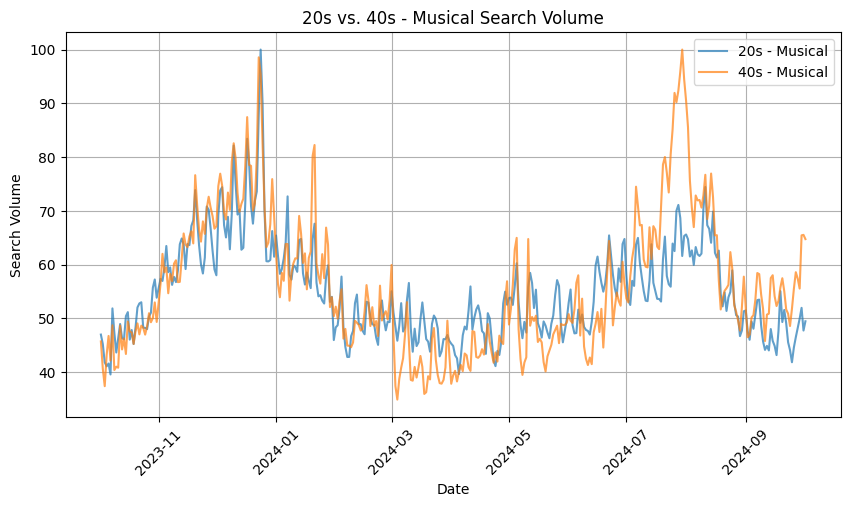

In [185]:
# 20대, 40대의 '뮤지컬' 검색량 비교
plt.figure(figsize=(10, 5))
plt.plot(df_20s["Date"], df_20s["Musical"], label="20s - Musical", alpha=0.7)
plt.plot(df_40s["Date"], df_40s["Musical"], label="40s - Musical", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Search Volume")
plt.title("20s vs. 40s - Musical Search Volume")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

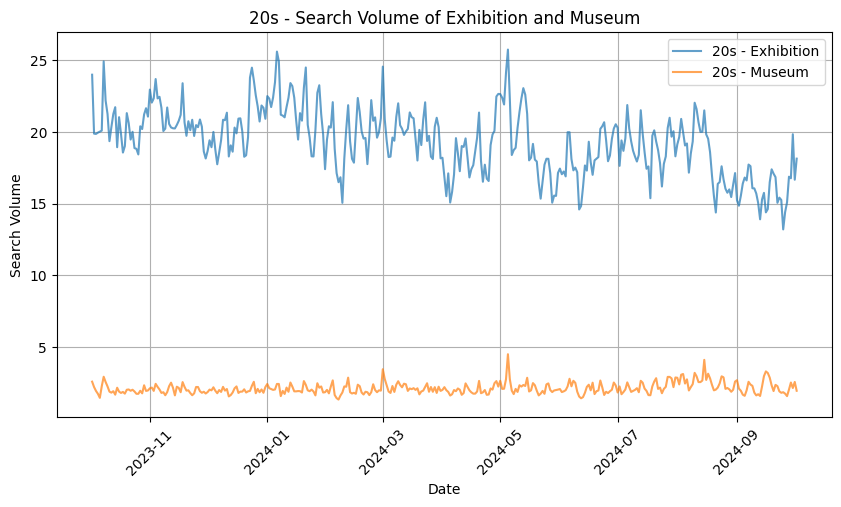

In [183]:
# 20대의 '전시회', '박물관' 검색량 비교
plt.figure(figsize=(10, 5))
plt.plot(df_20s["Date"], df_20s["Exhibition"], label="20s - Exhibition", alpha=0.7)
plt.plot(df_20s["Date"], df_20s["Museum"], label="20s - Museum", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Search Volume")
plt.title("20s - Search Volume of Exhibition and Museum")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

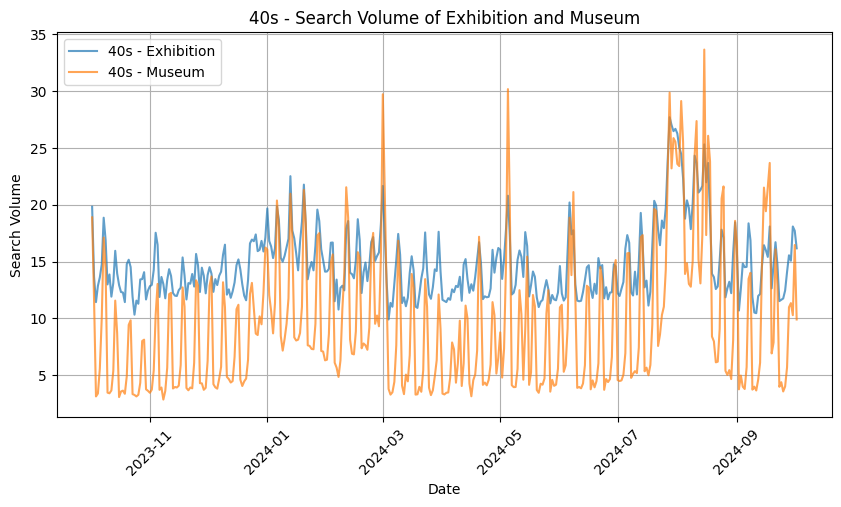

In [191]:
# 40대의 '전시회', '박물관' 검색량 비교
plt.figure(figsize=(10, 5))
plt.plot(df_40s["Date"], df_40s["Exhibition"], label="40s - Exhibition", alpha=0.7)
plt.plot(df_40s["Date"], df_40s["Museum"], label="40s - Museum", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Search Volume")
plt.title("40s - Search Volume of Exhibition and Museum")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()